<a href="https://colab.research.google.com/github/costprot/Taiwanese_Bankruptcy_Prediction/blob/main/TaiwaneseBankruptcyPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taiwanese Bankruptcy Prediction

## About the dataset :
The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

*   Number of Instances : 6819 
*   Number of Features  : 96
*   Output Feature      : Bankrupt?

In [ ]:
import pandas as pd
import io

In [ ]:
df = pd.read_csv('data.csv')
df.shape

(6819, 96)

In [ ]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### EDA

In [ ]:
## imports for data cleaning
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
# descriptive statistics
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
# search for missing values -- no missing values
df.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

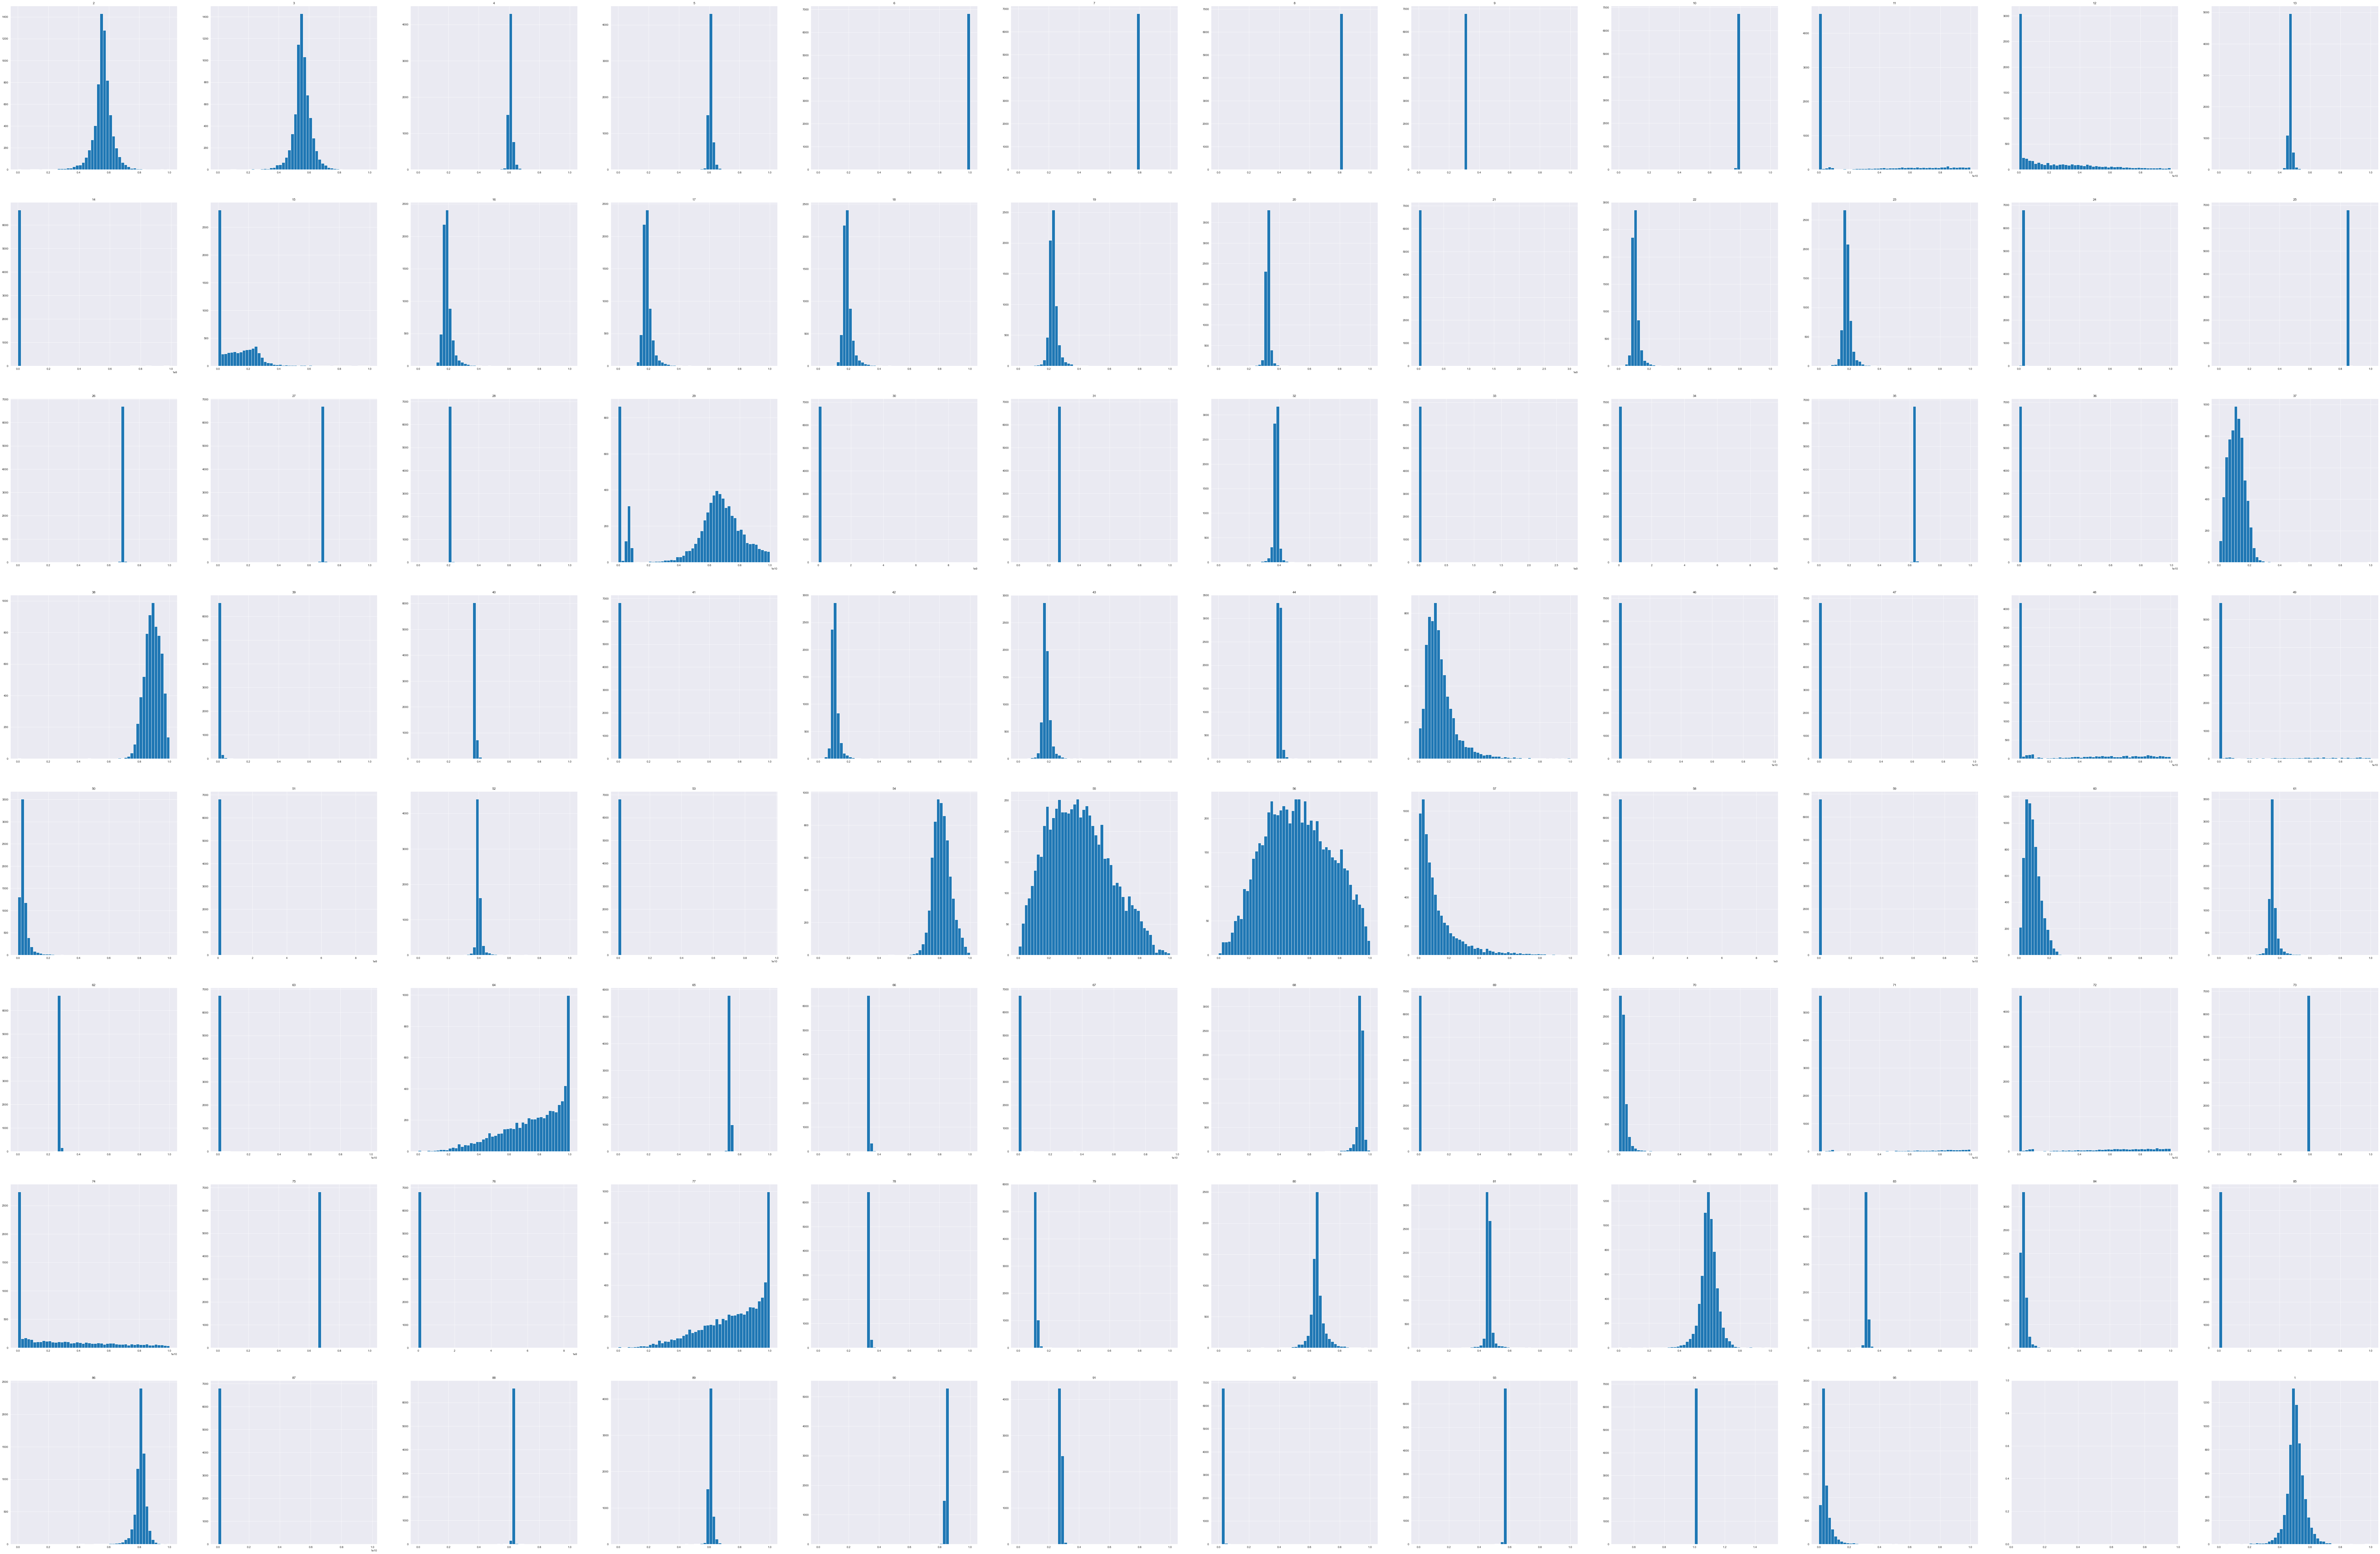

In [ ]:
## In order to understand better how all the features are distributed we are going to visualize them using a histplot
fig, axs = plt.subplots(8,12)
axs = fig.gca()
for i in range(1,96):
    df.iloc[:,i].hist(figsize = (150,100), bins = 50)
    plt.title(label=str(i), loc='center')
    plt.subplot(8,12,i)
plt.show()
#The folowing parameters take values of almost zero variation so they are going to be exluded
#5 6 7 8 9 10
#13 20 23 24
#25 26 27 29 30 32 33 34 35
#38 40 45 46 47 48
#50 52 57 58 
#61 62 63 64 65 70 72
#74 75 84
#86 87 91 92 93 95
#[5,6,7,8,9,10,13,20,23,24,25,26,27,29,30,32,33,34,35,38,40,45,46,47,48,50,52,57,58,61,62,63,64,65,70,72,74,75,84,86,87,91,92,93,95]

<AxesSubplot:>

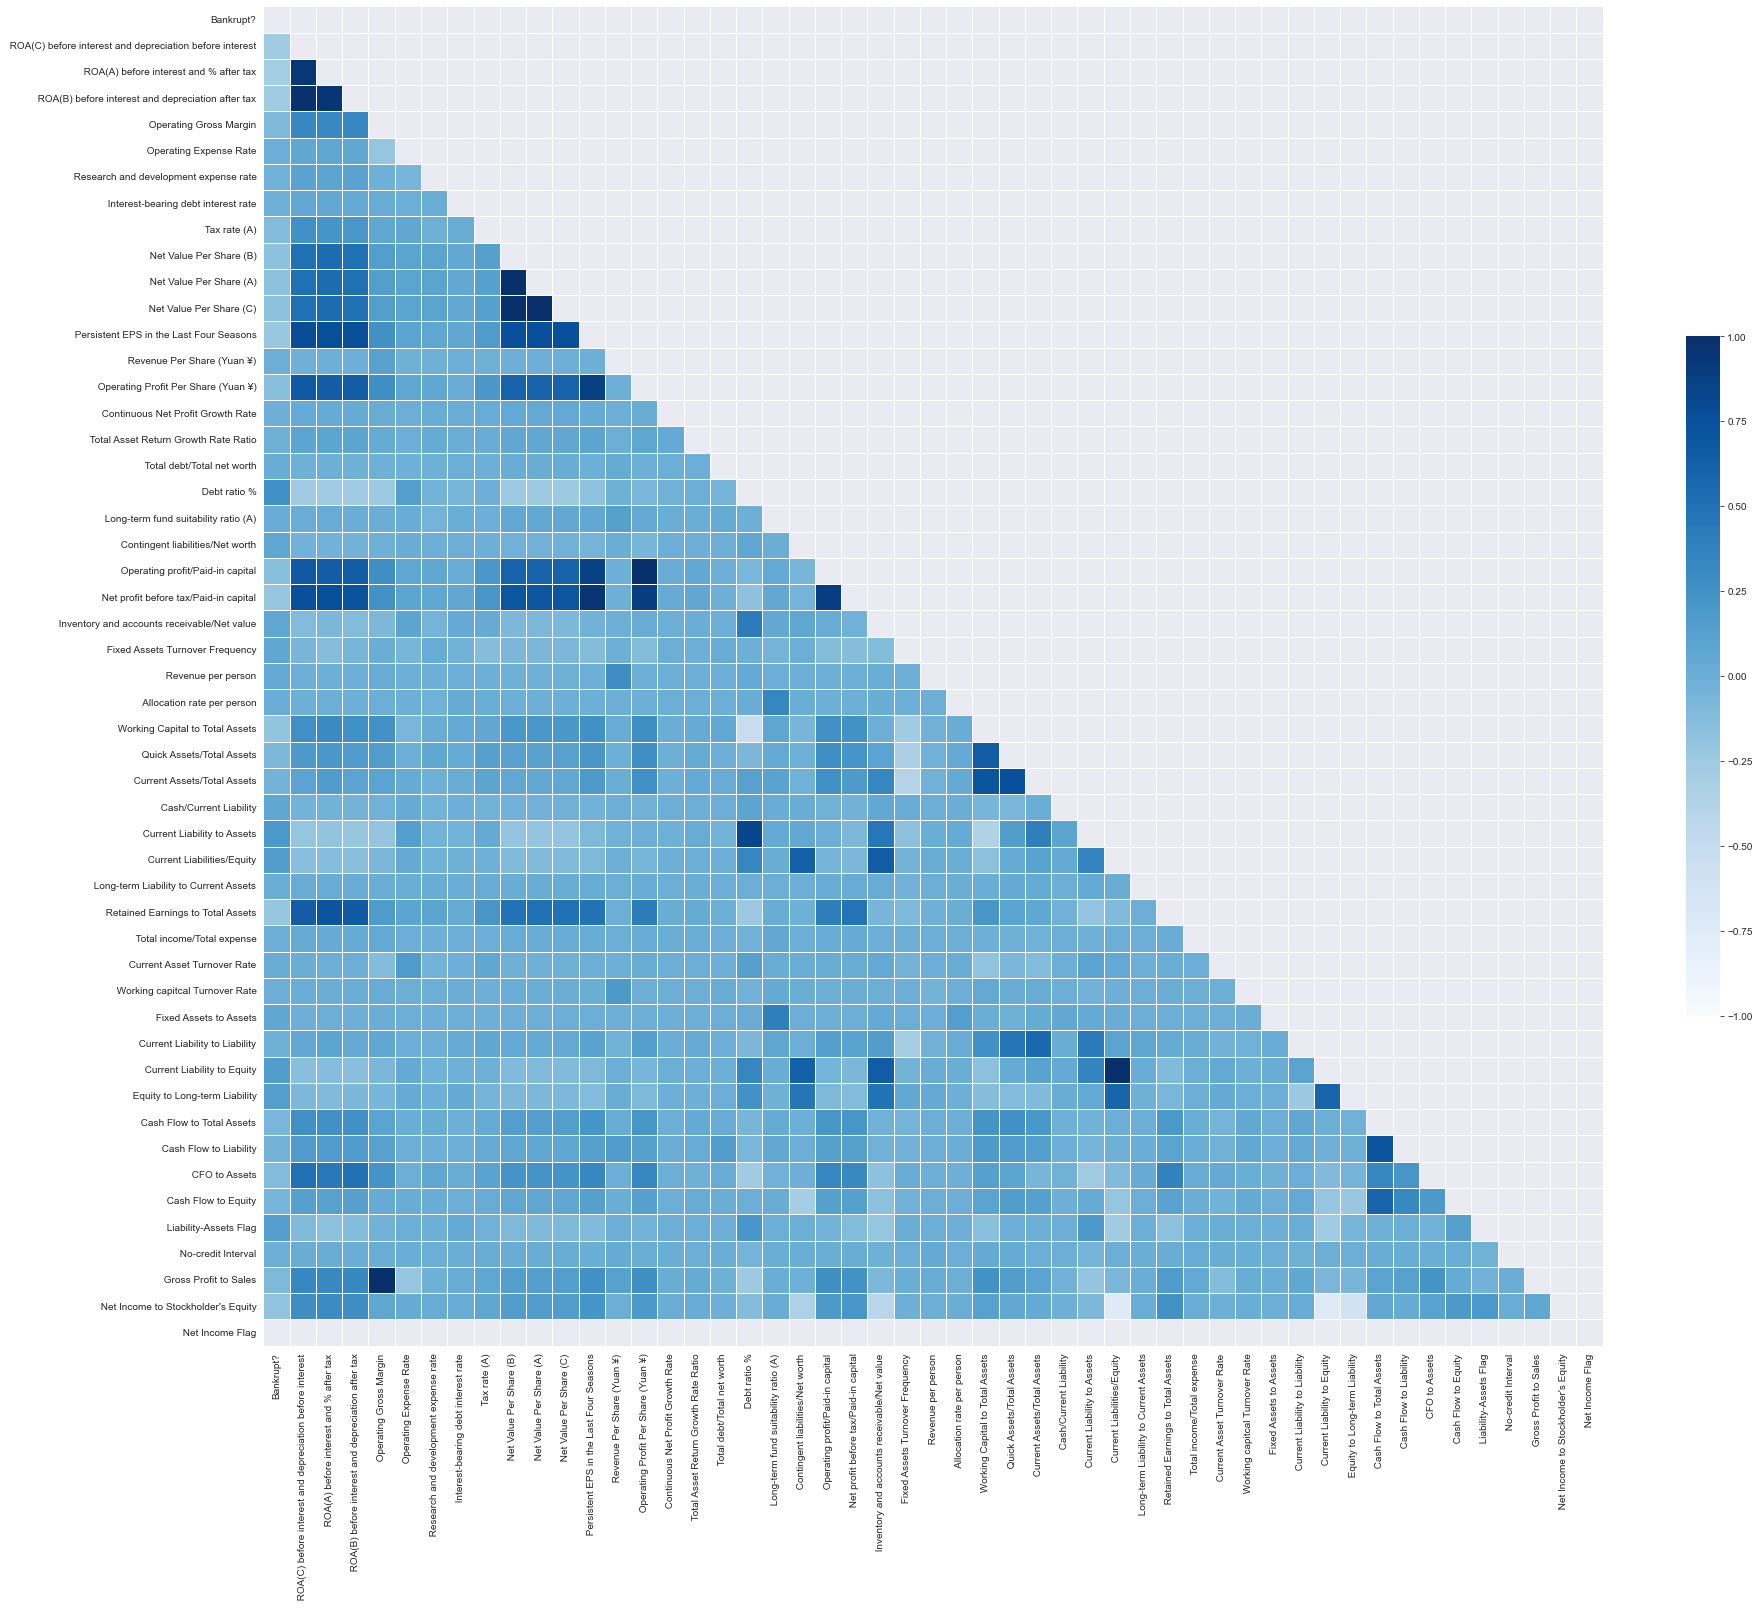

In [ ]:
## correlation heatmap
excludelist0 = [5,6,7,8,9,10,13,20,23,24,25,26,27,29,30,32,33,34,35,38,40,45,46,47,48,50,52,57,58,61,62,63,64,65,70,72,74,75,84,86,87,91,92,93,95]
excludelist = []
for e in range(0,96):
    if e not in excludelist0:
        excludelist.append(e)
df_ex  = df.iloc[:,excludelist]
plt.figure(figsize=(30,25))
sns.heatmap(df_ex.corr(), cmap="Blues",mask=np.triu(np.ones_like(df_ex.corr(), dtype=bool)) , center=0, vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})

0    6599
1     220
Name: Bankrupt?, dtype: int64


0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64




C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Not Bankrupt'), Text(1, 0, 'Bankrupt')]

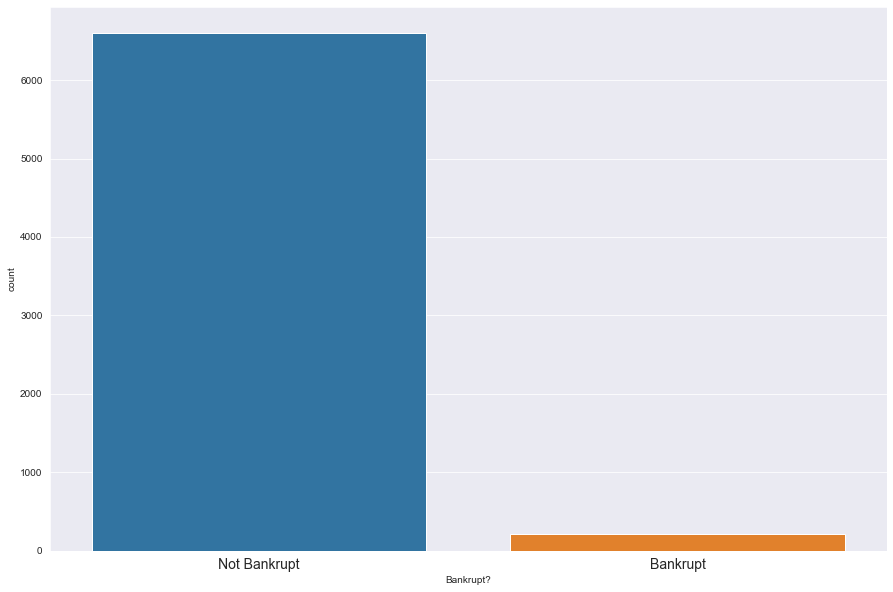

In [ ]:
# print count and percentage
print(df_ex['Bankrupt?'].value_counts())
print('\n')
print(df_ex['Bankrupt?'].value_counts(normalize=True))
print('\n')

#plot that also
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(df_ex['Bankrupt?'])
ax.set_xticklabels(['Not Bankrupt', 'Bankrupt'], fontsize=14)

To conclude for the dataset :


*   There are no null values to impute
*   All the values are numeric
*   No duplicate values
*   There exist quite a few outliers in some columns, but for now we are going
 to proceed with the original dataset
*   Values of column 'Net Income Flag' are all equal to 1 so it will be ok to drop it


Also, we found that our data is highly imbalanced(only a few records exists that indicate that a company is bankrup) which needs to be fixed before splitting it into train and test sets or else the model applied would predict every company to not go bankrupt.







## Data Preperation for models
Split our target from our predictors and train test split in order to leave a sample of the data for our model to test on at the end. Our dataset is more than 6000 rows so we will keep our test size at 20% and train on 80% of the data.

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split


In [ ]:
# drop column ' Net Income Flag'
df_wo_net = df_ex.drop(columns=' Net Income Flag')

In [ ]:
 # Split dataset to 70% - 30%
x = df_wo_net.drop(columns='Bankrupt?')
y = df_wo_net['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4773, 49), (4773,), (2046, 49), (2046,))

##Create functions for the models, for the visualization and the comparison of results 

In [ ]:
# import for models and metrics
from sklearn.preprocessing   import StandardScaler
from imblearn.over_sampling  import SMOTE

from time                    import time
from sklearn.linear_model    import LogisticRegression
import xgboost as xgb
from xgboost                 import XGBClassifier
from sklearn.svm             import SVC
from sklearn.ensemble        import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline       import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.preprocessing import MinMaxScaler

####Balancing the dataset
As we saw before, the dataset is an imbalanced dataset(97% non-bankrupt). For that reason and in order for our model to 
learn about the minority class which is the bankrupt class, Synthetic Minority Over-sampling technique (SMOTE) is used to balance our model.
Creates new samples by interpolation of samples of the minority class and any of its k nearest neighbours (also from the minority class). K is typically 5. Also as we can see bellow, the same process will be used for SMOTE as will for StandardScaler. Both will be added to the pipeline, as we want to ensure that the scaled and oversampling is done within each fold and not across all folds

In [ ]:
# function to run method
def model_execution(model, model_name):
  
    pipe = Pipeline(steps= [('smote', SMOTE(random_state = 42 ,k_neighbors = 5 , n_jobs = 4)), 
                          ('standardscaler', StandardScaler()),
                          (model_name, model)])
    start = time()
    fitted_model = pipe.fit(X_train, y_train)
    end = time()
    runtime = round((end - start),4)
    print(f"{model_name} took {runtime} seconds or {round((runtime/60),4)} minutes to run.")
 
    return fitted_model, runtime

In [ ]:
# function to fit the model
def model_prediction(fitted_model, x_feat):
  
    pred = fitted_model.predict(x_feat)
    return pred

In [ ]:
# function in order to plot the roc_curve
def eval_classification (y_pred, y_true, x_data, model_name, train_test):

    fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
    print(f''' {model_name} for {train_test} Data FPR {fpr} TPR {tpr}''')

    f, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5))
    RocCurveDisplay.from_predictions(y_true, y_pred, ax=ax0, name=f'{model_name} {train_test} ROC_Curve')
    PrecisionRecallDisplay.from_predictions(y_true, y_pred, ax=ax1, name=f'{model_name} {train_test} Precision/Recall')
    plt.show()
    return

In [ ]:
# function for the scores 
def model_evaluation (y_true, y_pred, model_name, train_test):

    df_score=pd.DataFrame({ 
                   'model_name' : [model_name, model_name, model_name, model_name, model_name],
                   'type'       : [train_test, train_test, train_test, train_test, train_test],
                   'metric_name': ['Accuracy_Score', 'F1_Score', 'Recall', 'Precision', 'Roc_Auc_Score'],
                   'metric'     : [round(accuracy_score(y_true, y_pred) , 4),
                                   round(f1_score(y_true, y_pred)       , 4),
                                   round(recall_score(y_true, y_pred)   , 4),
                                   round(precision_score(y_true, y_pred), 4),
                                   round(roc_auc_score(y_true, y_pred)  , 4)]
  })
    display(df_score)
    return df_score

## Implementation of models

###Logistic Regression

Logistic_Regression took 0.3398 seconds or 0.0057 minutes to run.




,model_name,type,metric_name,metric
0,LG,Train,Accuracy_Score,0.8871
1,LG,Train,F1_Score,0.3099
2,LG,Train,Recall,0.8521
3,LG,Train,Precision,0.1894
4,LG,Train,Roc_Auc_Score,0.8701




 LG for Train Data FPR [0.         0.11185489 1.        ] TPR [0.         0.85211268 1.        ]


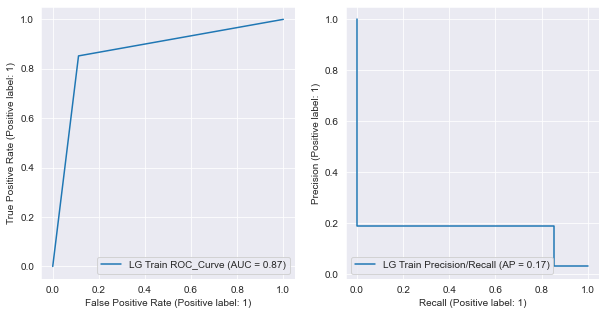

,model_name,type,metric_name,metric
0,LG,Test,Accuracy_Score,0.8817
1,LG,Test,F1_Score,0.3495
2,LG,Test,Recall,0.8333
3,LG,Test,Precision,0.2211
4,LG,Test,Roc_Auc_Score,0.8585




 LG for Test Data FPR [0.         0.11636179 1.        ] TPR [0.         0.83333333 1.        ]


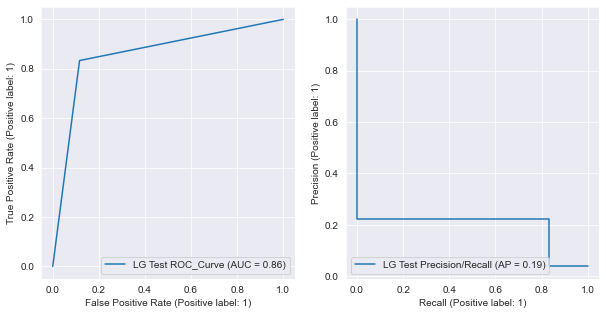

In [ ]:
# Logistic Regression run 
lr_model, lr_runtime = model_execution(LogisticRegression(max_iter=500), 'Logistic_Regression')
train_pred_lr = model_prediction(lr_model, X_train)
test_pred_lr  = model_prediction(lr_model, X_test)

# Logistic Regression Evaluation
print("\n")
LG_train = model_evaluation(y_train, train_pred_lr, 'LG', 'Train')
print("\n")
eval_classification(train_pred_lr, y_train, X_train, 'LG', 'Train')

print("\n")
LG_test = model_evaluation(y_test, test_pred_lr, 'LG', 'Test')
print("\n")
eval_classification(test_pred_lr, y_test, X_test, 'LG', 'Test')

###Support Vector Machine

SVC took 2.697 seconds or 0.045 minutes to run.




,model_name,type,metric_name,metric
0,SVC,Train,Accuracy_Score,0.9269
1,SVC,Train,F1_Score,0.4307
2,SVC,Train,Recall,0.9296
3,SVC,Train,Precision,0.2803
4,SVC,Train,Roc_Auc_Score,0.9282




 SVC for Train Data FPR [0.         0.07320233 1.        ] TPR [0.         0.92957746 1.        ]


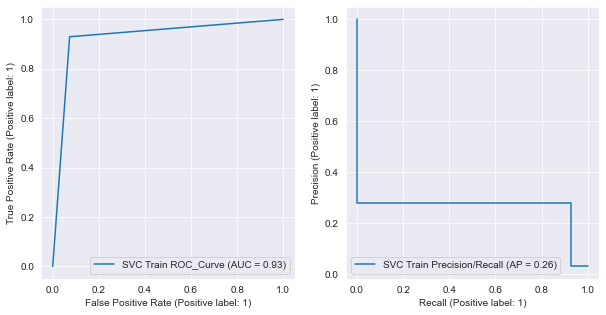

,model_name,type,metric_name,metric
0,SVC,Test,Accuracy_Score,0.9013
1,SVC,Test,F1_Score,0.3129
2,SVC,Test,Recall,0.5897
3,SVC,Test,Precision,0.2130
4,SVC,Test,Roc_Auc_Score,0.7517




 SVC for Test Data FPR [0.         0.08638211 1.        ] TPR [0.         0.58974359 1.        ]


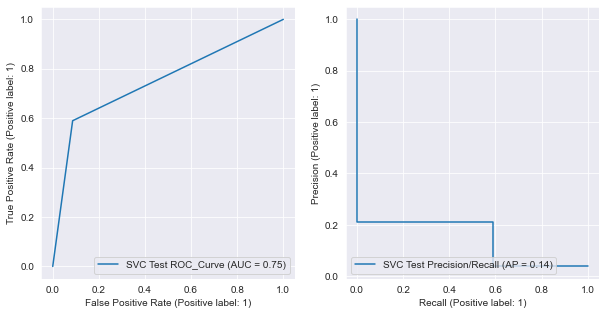

In [ ]:
# Linear Support Vector run
SVC_model, SVC_runtime = model_execution(SVC(), 'SVC')
train_pred_SVC = model_prediction(SVC_model, X_train)
test_pred_SVC  = model_prediction(SVC_model, X_test)

# Linear Support Vector Evaluation
print("\n")
SVC_train = model_evaluation(y_train, train_pred_SVC,'SVC', 'Train')
print("\n")
eval_classification(train_pred_SVC, y_train, X_train, 'SVC', 'Train')

print("\n")
SVC_test = model_evaluation(y_test, test_pred_SVC, 'SVC', 'Test')
print("\n")
eval_classification(test_pred_SVC, y_test, X_test, 'SVC', 'Test')

###Random Forest

RandomForest took 5.5873 seconds or 0.0931 minutes to run.




,model_name,type,metric_name,metric
0,RFC,Train,Accuracy_Score,1.0
1,RFC,Train,F1_Score,1.0
2,RFC,Train,Recall,1.0
3,RFC,Train,Precision,1.0
4,RFC,Train,Roc_Auc_Score,1.0




 RFC for Train Data FPR [0. 0. 1.] TPR [0. 1. 1.]


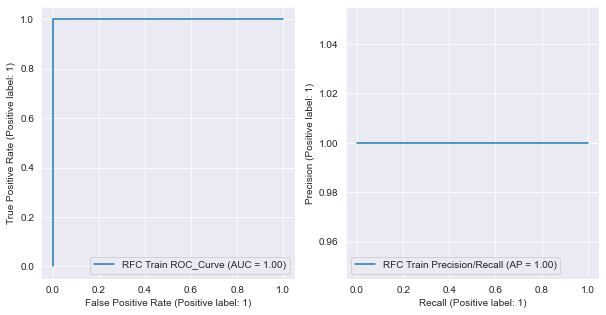

,model_name,type,metric_name,metric
0,RFC,Test,Accuracy_Score,0.9448
1,RFC,Test,F1_Score,0.4264
2,RFC,Test,Recall,0.5385
3,RFC,Test,Precision,0.3529
4,RFC,Test,Roc_Auc_Score,0.7497




 RFC for Test Data FPR [0.         0.03912602 1.        ] TPR [0.         0.53846154 1.        ]


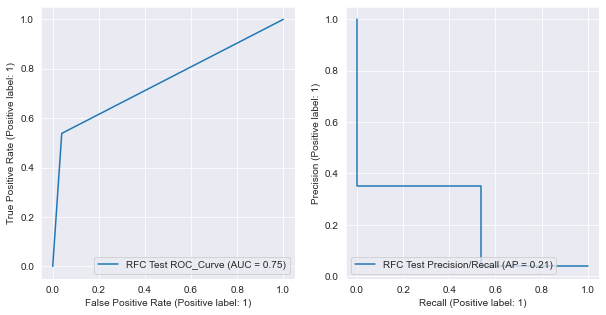

In [ ]:
#  Random Forest model run
RFC_model, RFC_runtime = model_execution(RandomForestClassifier(), 'RandomForest')
train_pred_RFC = model_prediction(RFC_model, X_train)
test_pred_RFC  = model_prediction(RFC_model, X_test)

# Random Forest Evaluation
print("\n")
RFC_train = model_evaluation(y_train, train_pred_RFC, 'RFC', 'Train')
print("\n")
eval_classification(train_pred_RFC, y_train, X_train,'RFC', 'Train')

print("\n")
RFC_test = model_evaluation(y_test, test_pred_RFC,'RFC', 'Test')
print("\n")
eval_classification(test_pred_RFC, y_test, X_test, 'RFC', 'Test')

Naive Bayes took 0.0887 seconds or 0.0015 minutes to run.




,model_name,type,metric_name,metric
0,NB,Train,Accuracy_Score,0.8336
1,NB,Train,F1_Score,0.2170
2,NB,Train,Recall,0.7746
3,NB,Train,Precision,0.1261
4,NB,Train,Roc_Auc_Score,0.8051




 NB for Train Data FPR [0.        0.1645433 1.       ] TPR [0.         0.77464789 1.        ]


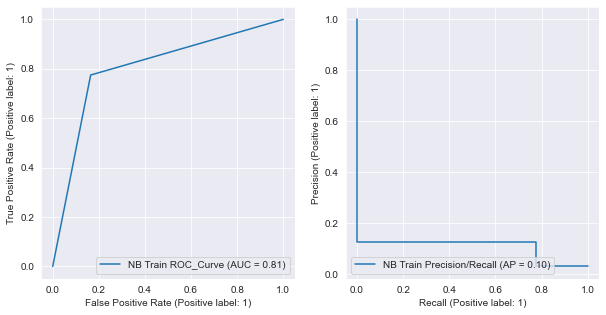

,model_name,type,metric_name,metric
0,NB,Test,Accuracy_Score,0.9448
1,NB,Test,F1_Score,0.4264
2,NB,Test,Recall,0.5385
3,NB,Test,Precision,0.3529
4,NB,Test,Roc_Auc_Score,0.7497




 NB for Test Data FPR [0.         0.17174797 1.        ] TPR [0.         0.83333333 1.        ]


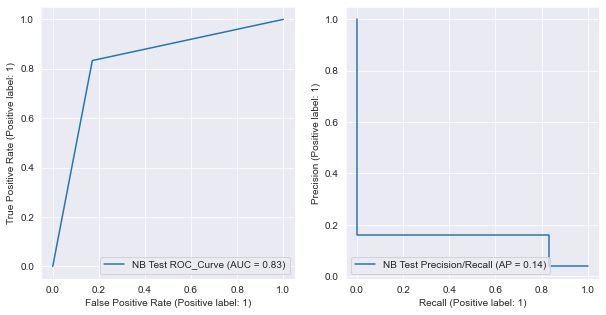

In [ ]:
#  Naive Bayes
NB_model, NB_runtime = model_execution(BernoulliNB(), 'Naive Bayes')
train_pred_NB = model_prediction(NB_model, X_train)
test_pred_NB  = model_prediction(NB_model, X_test)

# Naive Bayes Evaluation
print("\n")
NB_train = model_evaluation(y_train, train_pred_NB, 'NB', 'Train')
print("\n")
eval_classification(train_pred_NB, y_train, X_train,'NB', 'Train')

print("\n")
NB_test = model_evaluation(y_test, test_pred_RFC,'NB', 'Test')
print("\n")
eval_classification(test_pred_NB, y_test, X_test, 'NB', 'Test')

Multilayer Perceptron took 15.6698 seconds or 0.2612 minutes to run.




C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


,model_name,type,metric_name,metric
0,MLP,Train,Accuracy_Score,1.0
1,MLP,Train,F1_Score,1.0
2,MLP,Train,Recall,1.0
3,MLP,Train,Precision,1.0
4,MLP,Train,Roc_Auc_Score,1.0




 MLP for Train Data FPR [0. 0. 1.] TPR [0. 1. 1.]


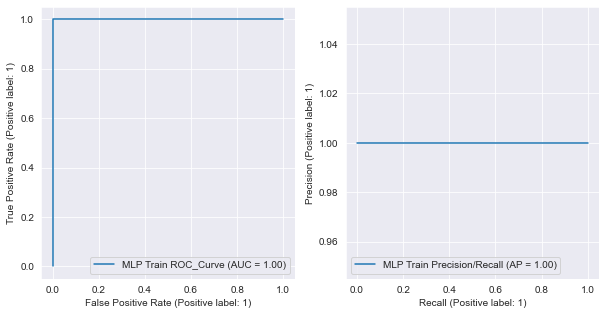

,model_name,type,metric_name,metric
0,MLP,Test,Accuracy_Score,0.9541
1,MLP,Test,F1_Score,0.3188
2,MLP,Test,Recall,0.2821
3,MLP,Test,Precision,0.3667
4,MLP,Test,Roc_Auc_Score,0.6314




 MLP for Test Data FPR [0.         0.01930894 1.        ] TPR [0.         0.28205128 1.        ]


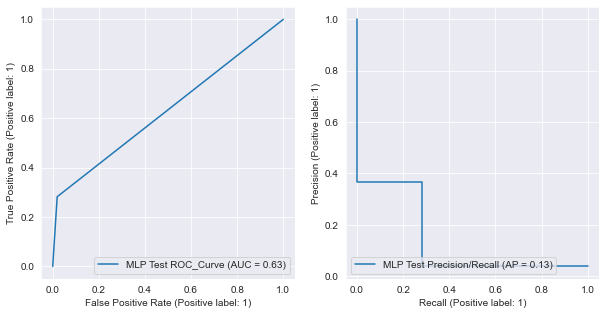

In [ ]:
#  Multilayer Perceptron 
MLP_model, MLP_runtime = model_execution(MLPClassifier(), 'Multilayer Perceptron')
train_pred_MLP = model_prediction(MLP_model, X_train)
test_pred_MLP  = model_prediction(MLP_model, X_test)

# Multilayer Perceptron Evaluation
print("\n")
MLP_train = model_evaluation(y_train, train_pred_MLP, 'MLP', 'Train')
print("\n")
eval_classification(train_pred_MLP, y_train, X_train,'MLP', 'Train')

print("\n")
MLP_test = model_evaluation(y_test, test_pred_MLP,'MLP', 'Test')
print("\n")
eval_classification(test_pred_MLP, y_test, X_test, 'MLP', 'Test')

Decision Tree took 0.6714 seconds or 0.0112 minutes to run.




,model_name,type,metric_name,metric
0,DT,Train,Accuracy_Score,1.0
1,DT,Train,F1_Score,1.0
2,DT,Train,Recall,1.0
3,DT,Train,Precision,1.0
4,DT,Train,Roc_Auc_Score,1.0




 DT for Train Data FPR [0. 0. 1.] TPR [0. 1. 1.]


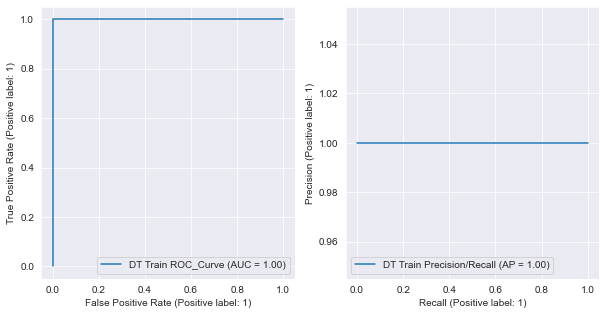

,model_name,type,metric_name,metric
0,DT,Test,Accuracy_Score,0.9223
1,DT,Test,F1_Score,0.2870
2,DT,Test,Recall,0.4103
3,DT,Test,Precision,0.2207
4,DT,Test,Roc_Auc_Score,0.6764




 DT for Test Data FPR [0.        0.0574187 1.       ] TPR [0.         0.41025641 1.        ]


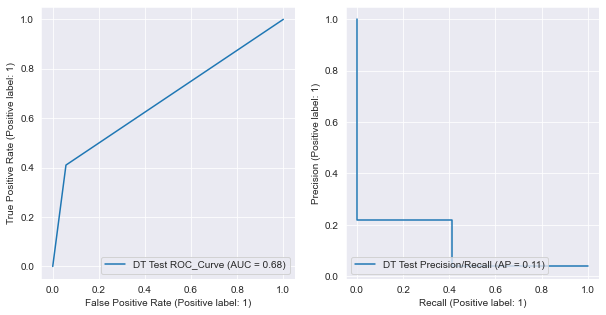

In [ ]:
#  Decision Tree 
DT_model, DT_runtime = model_execution(DecisionTreeClassifier(), 'Decision Tree')
train_pred_DT = model_prediction(DT_model, X_train)
test_pred_DT  = model_prediction(DT_model, X_test)

# Decision Tree Evaluation
print("\n")
DT_train = model_evaluation(y_train, train_pred_MLP, 'DT', 'Train')
print("\n")
eval_classification(train_pred_MLP, y_train, X_train,'DT', 'Train')

print("\n")
DT_test = model_evaluation(y_test, test_pred_DT,'DT', 'Test')
print("\n")
eval_classification(test_pred_DT, y_test, X_test, 'DT', 'Test')

###XGBoost

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:35:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier took 5.121 seconds or 0.0854 minutes to run.


,model_name,type,metric_name,metric
0,XGB,Train,Accuracy_Score,1.0
1,XGB,Train,F1_Score,1.0
2,XGB,Train,Recall,1.0
3,XGB,Train,Precision,1.0
4,XGB,Train,Roc_Auc_Score,1.0




 XGB for Train Data FPR [0. 0. 1.] TPR [0. 1. 1.]


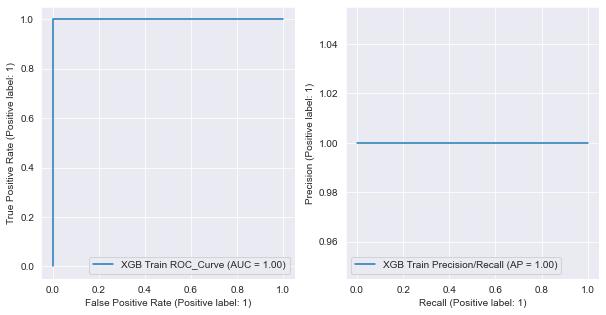

,model_name,type,metric_name,metric
0,XGB,Test,Accuracy_Score,0.9575
1,XGB,Test,F1_Score,0.4663
2,XGB,Test,Recall,0.4872
3,XGB,Test,Precision,0.4471
4,XGB,Test,Roc_Auc_Score,0.7316




 XGB for Test Data FPR [0.         0.02388211 1.        ] TPR [0.         0.48717949 1.        ]


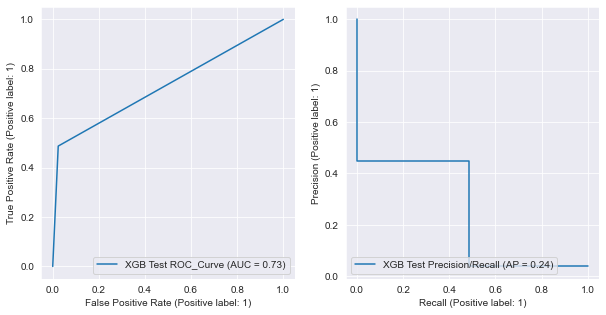

In [ ]:
# XGBoost run 
XGB_model, XGB_runtime = model_execution(XGBClassifier(), 'XGBClassifier')
train_pred_XGB = model_prediction(XGB_model, X_train)
test_pred_XGB  = model_prediction(XGB_model, X_test)

# XGBoost Evaluation
XGB_train = model_evaluation(y_train, train_pred_XGB, 'XGB', 'Train')
print("\n")
eval_classification(train_pred_XGB, y_train, X_train,'XGB', 'Train')

print("\n")
XGB_test = model_evaluation(y_test, test_pred_XGB,'XGB', 'Test')
print("\n")
eval_classification(test_pred_XGB, y_test, X_test, 'XGB', 'Test')

## Create functions for model comparisons

In [ ]:
model_total = pd.concat([LG_train  , LG_test  , 
                           SVC_train , SVC_test ,
                           RFC_train , RFC_test , 
                           XGB_train , XGB_test,
                           NB_train , NB_test,
                           DT_train , DT_test,
                           MLP_train , MLP_test
                          ])

In [ ]:
# for model comparisons
def model_plot_scores(df, metric, axis):

    grouped_df = model_total[model_total['metric_name'] == metric]

    sns.set_style("darkgrid")
    g = sns.barplot( data=grouped_df, hue='type', x='model_name', y='metric', ax=axis )
    g.set_ylabel(metric)
    g.set_title(f'{metric}')
    g.legend(loc=(0.7,1.15))

    return

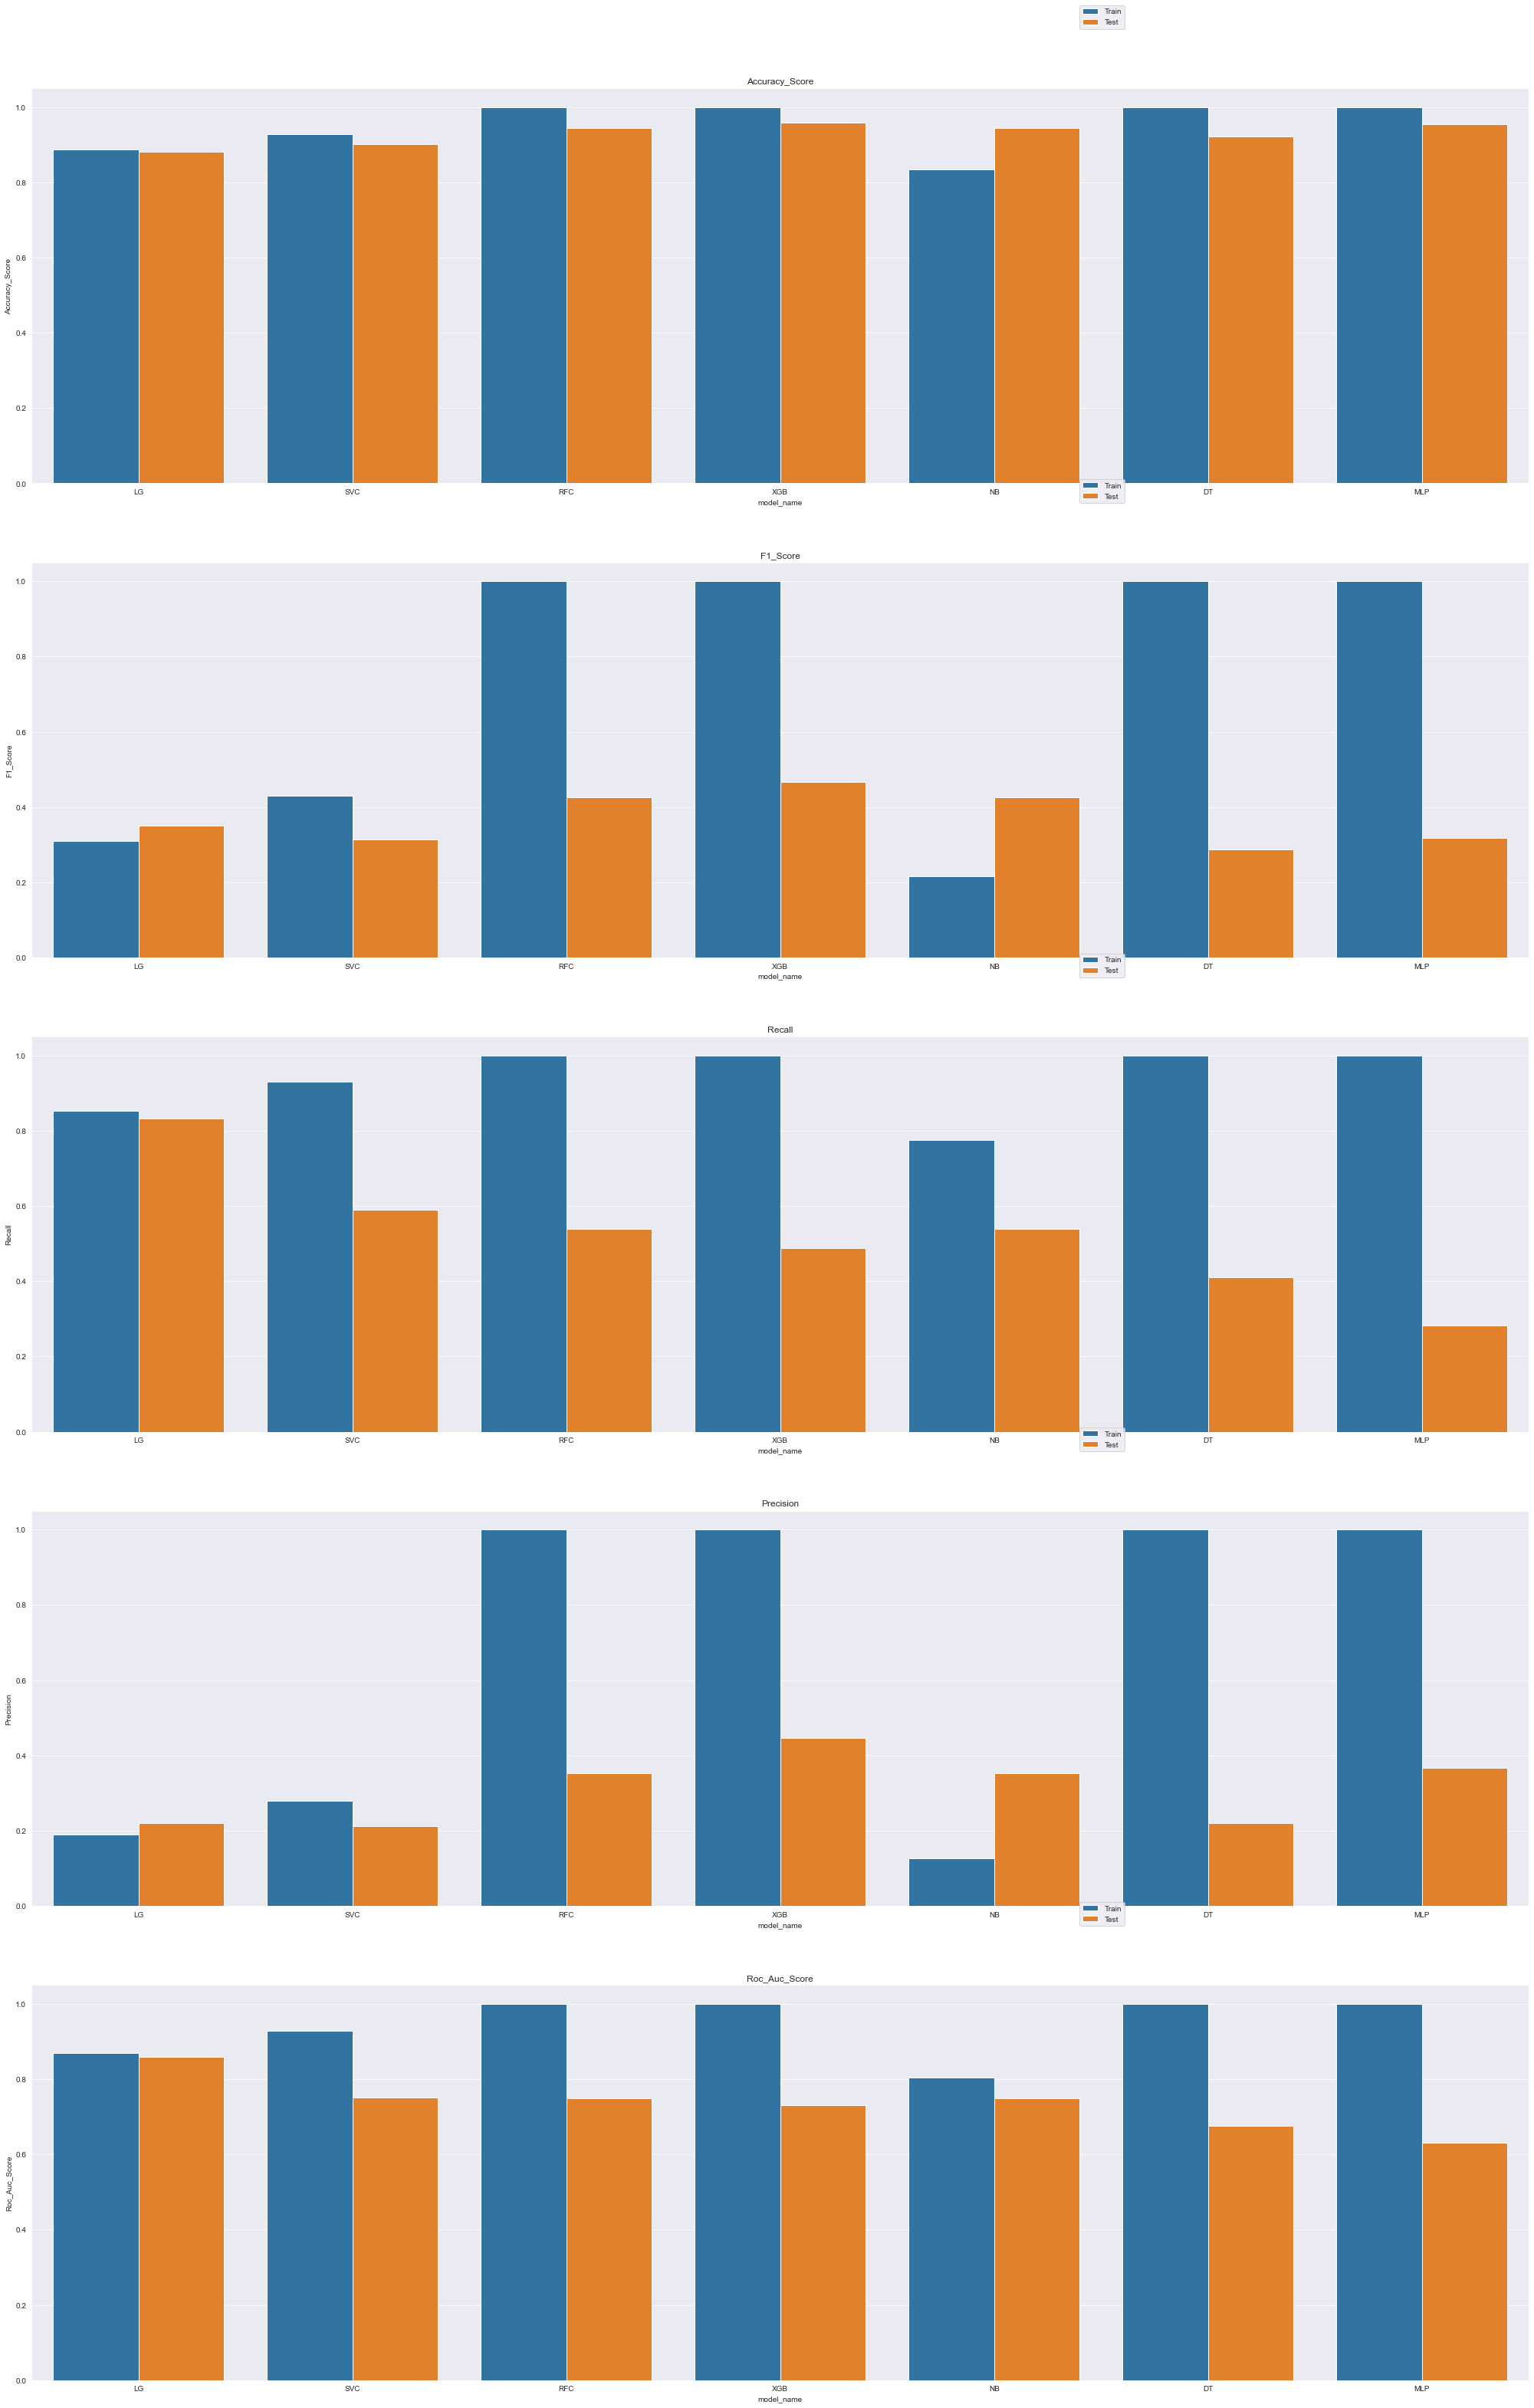

In [ ]:
## Plot the scores of every method 
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1, figsize=(35,55))

model_plot_scores(model_total, 'Accuracy_Score'      , ax0)
model_plot_scores(model_total, 'F1_Score'            , ax1)
model_plot_scores(model_total, 'Recall'              , ax2)
model_plot_scores(model_total, 'Precision'           , ax3)
model_plot_scores(model_total, 'Roc_Auc_Score'       , ax4)

####As we can see from the previous metrics also visuals:
we can observe models with high training precision scores perform worse on the testing data, suggesting our models were overfit on the training data. Our recall scores dropped when we applied test data to the models.
The model with the highest training precision score was:


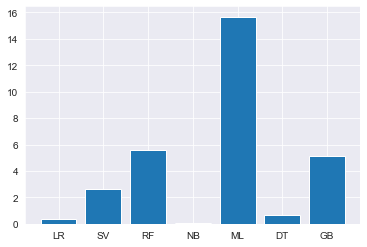

In [ ]:
#Execution time comparison
#Logistic_Regression took 0.3398 seconds or 0.0057 minutes to run.
#SVC took 2.697 seconds or 0.045 minutes to run.
#RandomForest took 5.5873 seconds or 0.0931 minutes to run.
#Naive Bayes took 0.0887 seconds or 0.0015 minutes to run.
#Multilayer Perceptron took 15.6698 seconds or 0.2612 minutes to run.
#Decision Tree took 0.6714 seconds or 0.0112 minutes to run.
#XGBClassifier took 5.121 seconds or 0.0854 minutes to run.
LBLS = ['LR','SV','RF','NB','ML','DT','GB']
TMS = [0.3398, 2.607, 5.5873, 0.0887, 15.6698, 0.6714,5.121]
plt.bar(LBLS,TMS)
plt.show()